In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [6]:
trial_name = 'pilot_it2_collision_non-sphere_box_0012'
high_std_file_path = f'/home/haoliangwang/data/b3d_tracking_results/gt_all_info/collide/{trial_name}.json'
low_std_file_path = f'/home/haoliangwang/data/b3d_tracking_results/gt_all_info_0.01_std/collide/{trial_name}.json'

In [7]:
with open(high_std_file_path) as f:
    high_std_file = json.load(f)
with open(low_std_file_path) as f:
    low_std_file = json.load(f)

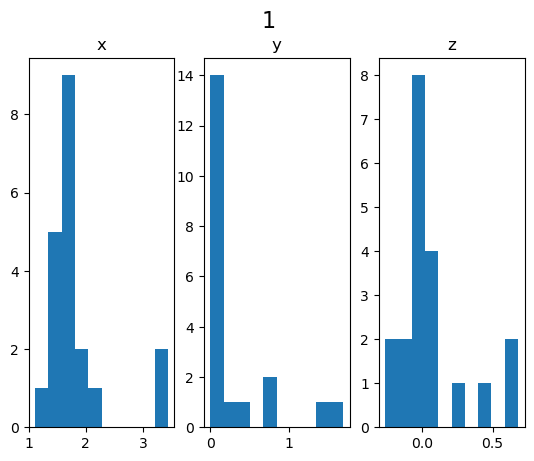

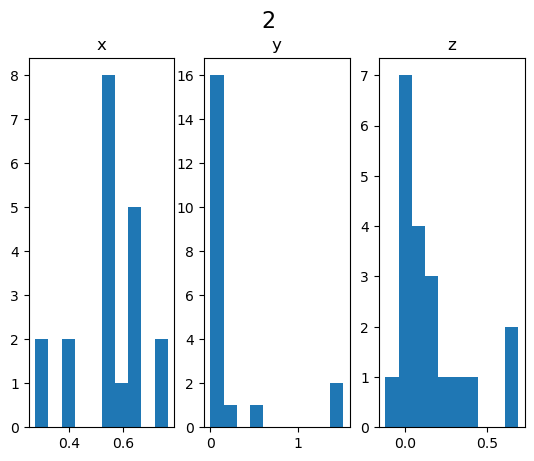

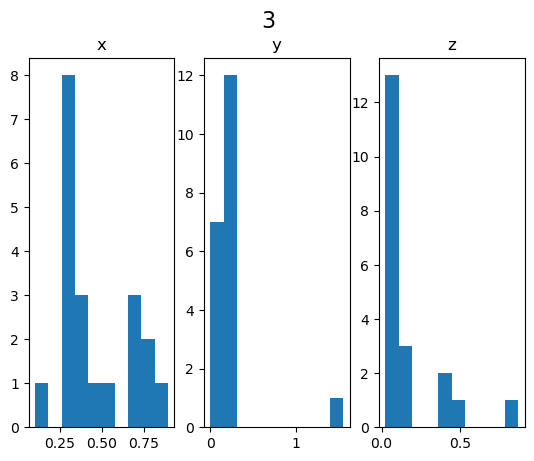

In [8]:
for key, val in high_std_file['position'].items():
    xs = []
    ys = []
    zs = []
    for pos in val:
        xs.append(list(pos.values())[0])
        ys.append(list(pos.values())[1])
        zs.append(list(pos.values())[2])
    fig = plt.figure()
    fig.suptitle(key, fontsize=16)
    ax1 = fig.add_subplot(131)
    ax1.hist(xs)
    ax1.set_title('x')
    ax2 = fig.add_subplot(132)
    ax2.hist(ys)
    ax2.set_title('y')
    ax3 = fig.add_subplot(133)
    ax3.hist(zs)
    ax3.set_title('z')

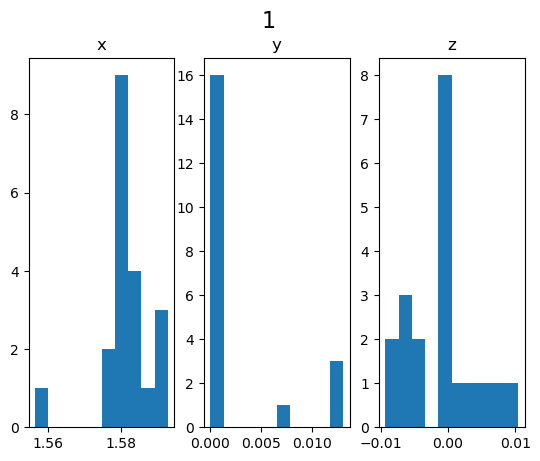

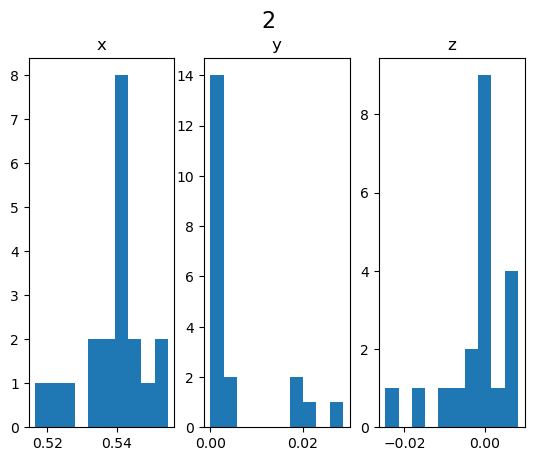

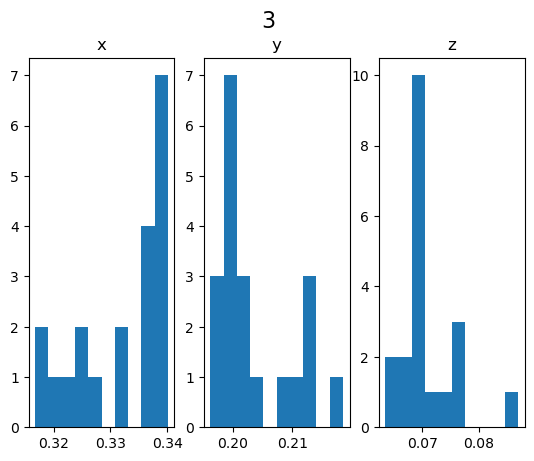

In [9]:
for key, val in low_std_file['position'].items():
    xs = []
    ys = []
    zs = []
    for pos in val:
        xs.append(list(pos.values())[0])
        ys.append(list(pos.values())[1])
        zs.append(list(pos.values())[2])
    fig = plt.figure()
    fig.suptitle(key, fontsize=16)
    ax1 = fig.add_subplot(131)
    ax1.hist(xs)
    ax1.set_title('x')
    ax2 = fig.add_subplot(132)
    ax2.hist(ys)
    ax2.set_title('y')
    ax3 = fig.add_subplot(133)
    ax3.hist(zs)
    ax3.set_title('z')

In [ ]:
import b3d
import jax


In [13]:
num_pose_grid = 11
rotation_deltas = b3d.Pose.concatenate_poses(
    [
        jax.vmap(b3d.Pose.sample_gaussian_vmf_pose, in_axes=(0, None, None, None))(
            jax.random.split(
                jax.random.PRNGKey(0), num_pose_grid * num_pose_grid * num_pose_grid
            ),
            b3d.Pose.identity(),
            1,
            10.0,
        ),
        b3d.Pose.identity()[None, ...],
    ]
)
rotation_deltas

Pose(position=Array([[ 0.35498047,  0.24438477, -1.0976562 ],
       [-1.3544922 , -0.71435547, -1.375     ],
       [ 0.10894775,  0.07788086,  0.05038452],
       ...,
       [-0.88183594, -0.7573242 ,  1.1220703 ],
       [-1.2539062 , -1.2626953 , -0.19128418],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32), quaternion=Array([[-0.2883732 , -0.28577614, -0.00555005,  0.91386116],
       [ 0.21153456,  0.17379175, -0.08844002,  0.95772016],
       [-0.23730218, -0.31130645, -0.3244914 ,  0.8610931 ],
       ...,
       [-0.03866065, -0.49035713,  0.28554052,  0.8225095 ],
       [ 0.33344486,  0.08678766,  0.33143833,  0.87831146],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],      dtype=float32))

In [14]:
xs = []
ys = []
zs = []
for rotation_delta in rotation_deltas:
    xs.append(rotation_delta._position[0])
    ys.append(rotation_delta._position[1])
    zs.append(rotation_delta._position[2])

(array([  2.,   8.,  45., 159., 321., 372., 267., 122.,  28.,   8.]),
 array([-3.80273438, -3.0851562 , -2.36757803, -1.64999998, -0.93242186,
        -0.21484375,  0.50273436,  1.22031248,  1.93789065,  2.6554687 ,
         3.37304688]),
 <BarContainer object of 10 artists>)

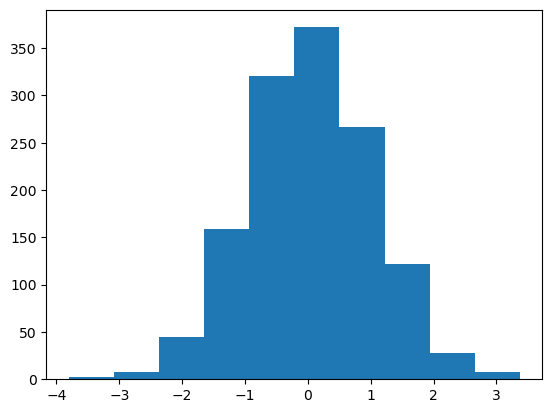

In [16]:
plt.hist(ys)